In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [7]:
def falsi(f, a, b, tolerancia=1e-6, maxiter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos.")

    for i in range(maxiter):
        # Paso 2: calcular el punto de intersección
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        fc = f(c)

        # Paso 3: criterio de convergencia
        if abs(fc) < tolerancia:
            print(f"Convergió en {i+1} iteraciones.")
            return c

        # Paso 3: actualizar intervalo
        if f(a) * fc < 0:
            b = c
        else:
            a = c

    print("No se alcanzó la tolerancia en el número máximo de iteraciones.")
    return c
def f(x):
    return x**2 - 4

raiz = falsi(f, 0, 5, tolerancia=1e-8)
print('La raíz aproximada es:',raiz)


Convergió en 26 iteraciones.
La raíz aproximada es: 1.9999999989169126


# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

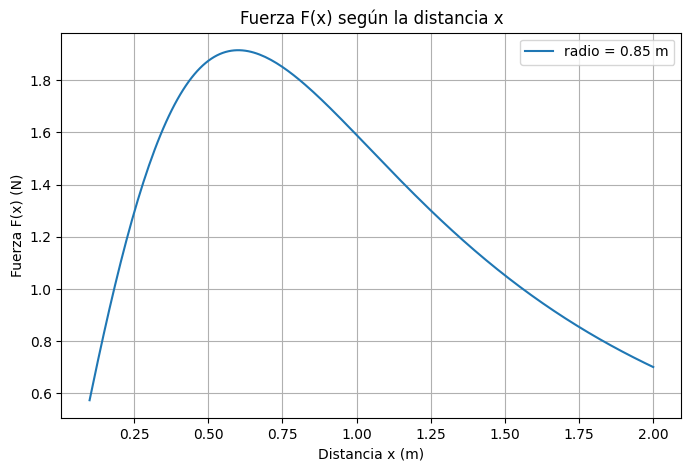

Para una fuerza de 1.25 N, la distancia x es aproximadamente: 1.29740 m


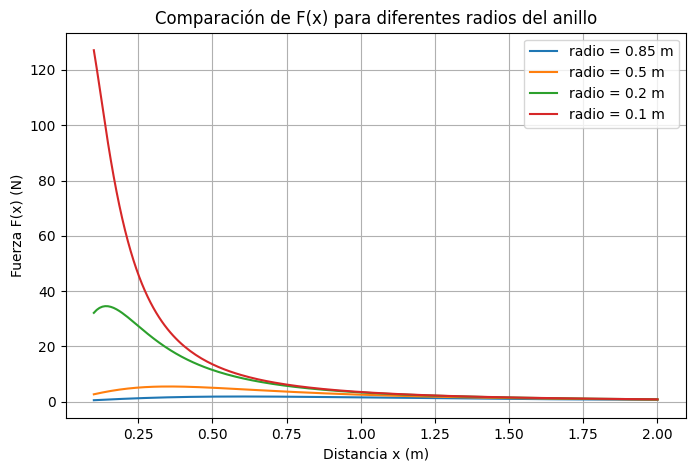

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Constantes físicas
epsilon_cero = 8.854e-12
carga_q = 2e-5
carga_Q = 2e-5
constante_k = 1 / (4 * np.pi * epsilon_cero)

# Función para calcular la fuerza F en función de la distancia x y el radio del anillo
def fuerza(x, radio):
    return constante_k * carga_q * carga_Q * x / (x**2 + radio**2)**(1.5)

# Derivada de la fuerza con respecto a x
def derivada_fuerza(x, radio):
    parte1 = (x**2 + radio**2)**1.5
    parte2 = 3 * x**2 * (x**2 + radio**2)**0.5
    numerador = parte1 - parte2
    denominador = (x**2 + radio**2)**3
    return constante_k * carga_q * carga_Q * numerador / denominador

# Graficar la fuerza en función de x para un radio fijo
radio_principal = 0.85
valores_x = np.linspace(0.1, 2.0, 200)
valores_fuerza = fuerza(valores_x, radio_principal)

plt.figure(figsize=(8, 5))
plt.plot(valores_x, valores_fuerza, label=f'radio = {radio_principal} m')
plt.xlabel('Distancia x (m)')
plt.ylabel('Fuerza F(x) (N)')
plt.title('Fuerza F(x) según la distancia x')
plt.grid(True)
plt.legend()
plt.show()

# Buscar el valor de x que da una fuerza de 1.25 N usando Newton-Raphson
def objetivo(x):
    return fuerza(x, radio_principal) - 1.25

valor_x = newton(objetivo, x0=1.0, fprime=lambda x: derivada_fuerza(x, radio_principal))
print(f"Para una fuerza de 1.25 N, la distancia x es aproximadamente: {valor_x:.5f} m")

# Comparar cómo cambia la fuerza al usar distintos radios
radios_para_comparar = [0.85, 0.5, 0.2, 0.1]

plt.figure(figsize=(8, 5))
for radio in radios_para_comparar:
    plt.plot(valores_x, fuerza(valores_x, radio), label=f'radio = {radio} m')

plt.xlabel('Distancia x (m)')
plt.ylabel('Fuerza F(x) (N)')
plt.title('Comparación de F(x) para diferentes radios del anillo')
plt.grid(True)
plt.legend()
plt.show()


# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



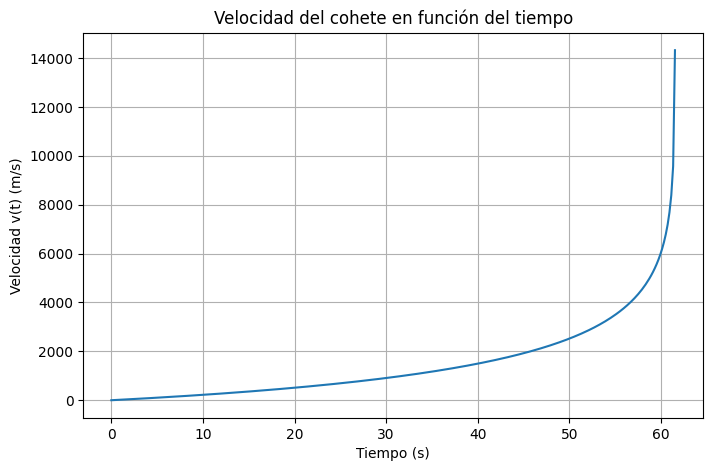

Con Newton-Raphson, el cohete alcanza 750 m/s en t ≈ 26.41 s
Con Bisección, el cohete alcanza 750 m/s en t ≈ 26.41 s
Con Regula-Falsi, el cohete alcanza 750 m/s en t ≈ 26.41 s


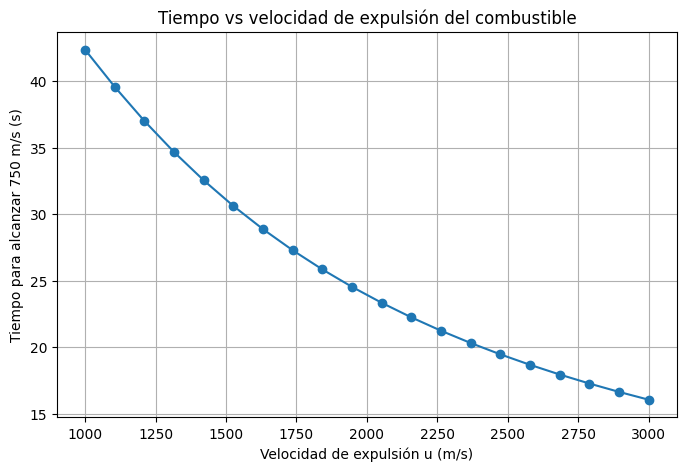